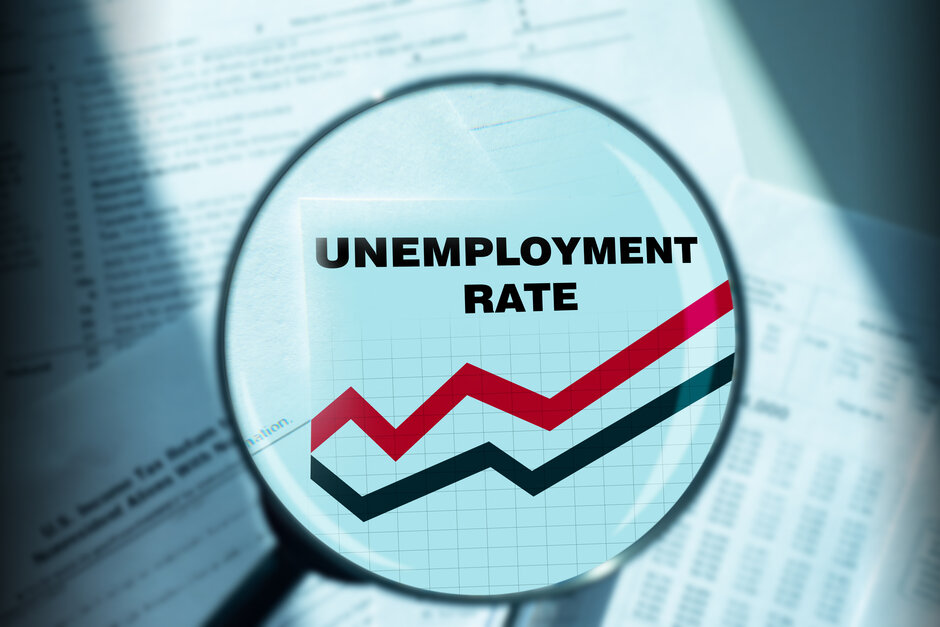

***IMPORTING NECESSARY PYTHON LIBRARIES AND LOADING THE DATASET***

In [68]:
import numpy as np #Python library for numerical computing
import pandas as pd #Python library used for data manipulation and analysis
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [69]:
# Load dataset and create a dataframe
df=pd.read_csv('/content/Unemployment in India.csv') #Reading csv file as a dataframe
df #printing the dataframe

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***EXPLORATORY DATA ANALYSIS***

In [70]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [71]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [73]:
#Removing unwanted spaces from column names
df.columns=df.columns.str.strip()
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# Detailed information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [75]:
df.shape

(768, 7)

In [76]:
df.dtypes

,0
Region,object
Date,object
Frequency,object
Estimated Unemployment Rate (%),float64
Estimated Employed,float64
Estimated Labour Participation Rate (%),float64
Area,object


***DATA PREPROCESSING***

**1. Handling Missing Values**

In [77]:
#Displaying the missing value count in ascending order
df.isna().sum().sort_values(ascending=True)

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [78]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]

,0
Region,3.645833
Date,3.645833
Frequency,3.645833
Estimated Unemployment Rate (%),3.645833
Estimated Employed,3.645833
Estimated Labour Participation Rate (%),3.645833
Area,3.645833


In [79]:
#displaying non-numerical columns(columns with objects)
df.select_dtypes(include='object').columns

Index(['Region', 'Date', 'Frequency', 'Area'], dtype='object')

In [80]:
# Drop Missing Values
# Drop rows with missing values
df = df.dropna()

In [81]:
df.isna().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [82]:
# Check for duplicates
print(df.duplicated().sum())

0


In [83]:
# Adding Day, Month, and Year
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

# Importing Warnings library
import warnings

# Ignoring unwanted warnings
warnings.filterwarnings("ignore")

df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,September,2019
...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,29,February,2020
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,31,March,2020
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,30,April,2020
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,31,May,2020


***Comprehensive Exploratory Data Analysis and Visual Insights***

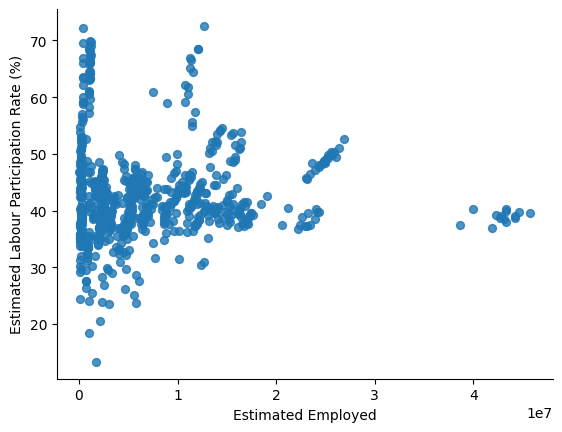

In [84]:
df.plot(kind='scatter', x='Estimated Employed', y='Estimated Labour Participation Rate (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

***Box Plot of Estimated Unemployment Rate by Region***

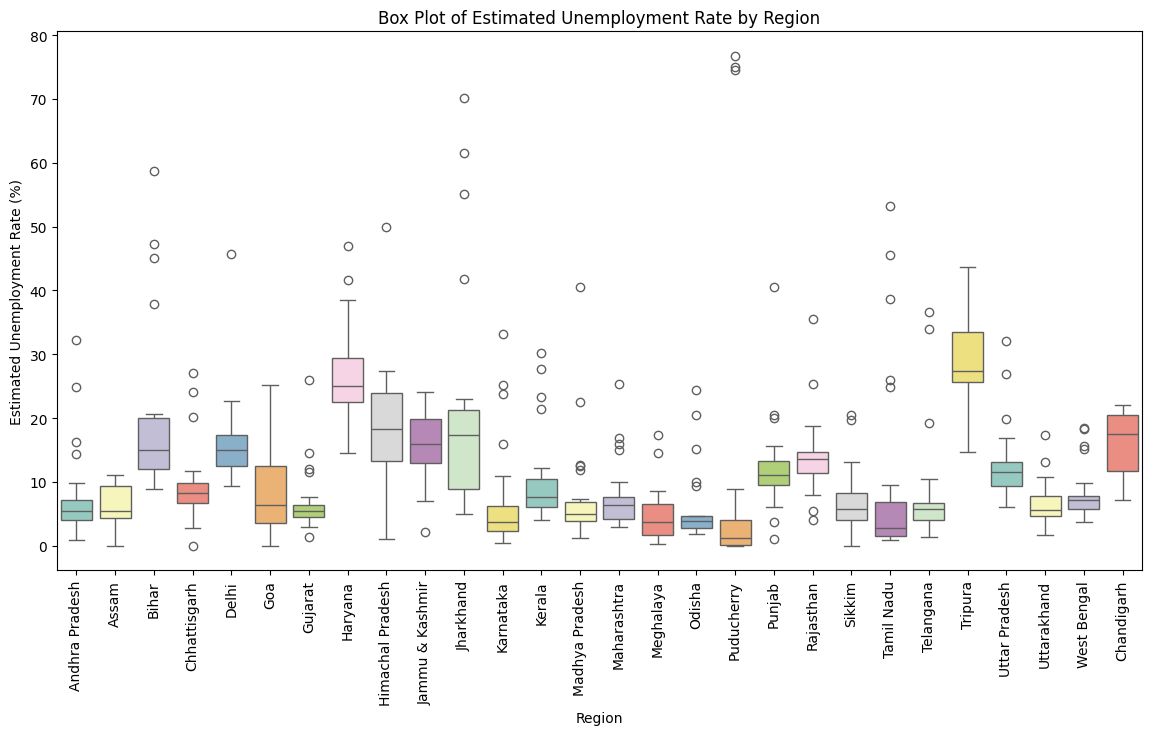

In [85]:
plt.figure(figsize=(14, 7))
# Create the box plot with separate colors for each region
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df, palette='Set3')
# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')
# Add title and axis labels
plt.title('Box Plot of Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')

# Show the plot
plt.show()

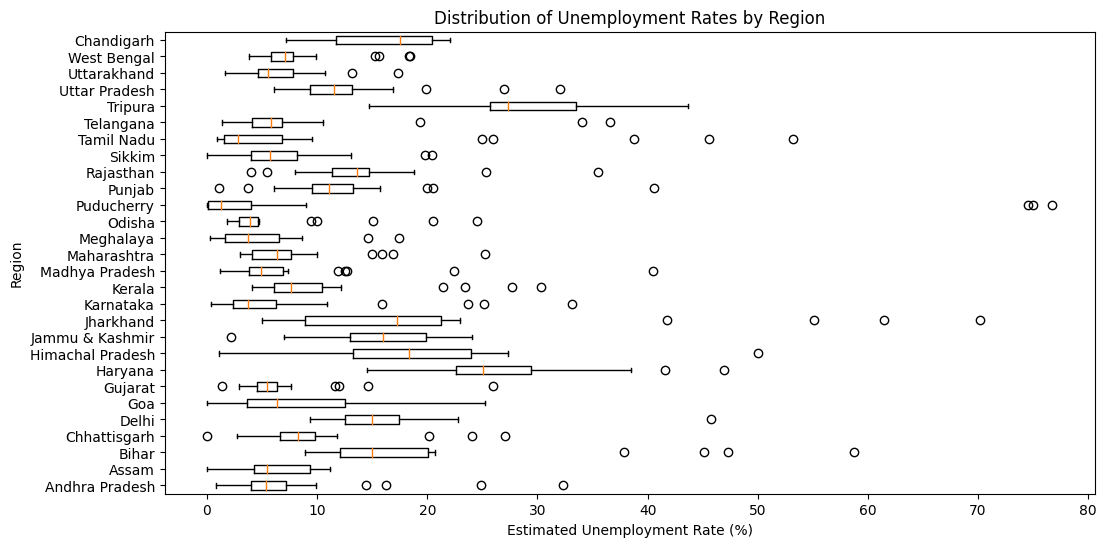

In [86]:
plt.figure(figsize=(12, 6))
plt.boxplot([df[df['Region'] == region]['Estimated Unemployment Rate (%)'] for region in df['Region'].unique()], labels=df['Region'].unique(), vert=False)
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Region')
_ = plt.title('Distribution of Unemployment Rates by Region')

_INSIGHTS FROM BOXPLOT_

This box plot provides a distribution of estimated unemployment rates across various regions. Here are the key insights:

1. Regional Variability :
   - There's significant variability in unemployment rates across different regions. Some regions have a wider range of unemployment rates (e.g., West Bengal, Tripura, Uttarakhand), indicating more variability in employment conditions within those regions.

2. Outliers :
   - Many regions have outliers, which are unemployment rates significantly higher or lower than the majority of the data points. These outliers may represent periods of economic distress, seasonal unemployment, or other anomalies in the data. For instance, Uttar Pradesh and Rajasthan have outliers extending above 50%, which are notably higher than the rest of the data for those regions.

3. Median Unemployment Rates :
   - The orange line inside each box represents the median unemployment rate for that region. Regions like Puducherry and Tamil Nadu have relatively low median unemployment rates, suggesting better overall employment conditions. On the other hand, regions like Bihar and Tripura have higher medians, indicating more widespread unemployment.

4. Spread of Unemployment Rates :
   - The length of each box (interquartile range or IQR) shows the spread of the middle 50% of the data. A smaller IQR (e.g., Kerala, Chandigarh) suggests that most unemployment rates are clustered around the median, while a larger IQR (e.g., West Bengal, Tripura) indicates a broader range of unemployment rates within the region.

5. Skewness :
   - The position of the median line within the box gives an idea of skewness. If the median is closer to the lower quartile, the data is positively skewed, and if closer to the upper quartile, it’s negatively skewed. For example, Meghalaya shows a negatively skewed distribution, while Uttar Pradesh shows a more positively skewed distribution.

6. Economic Insights :
   - Regions with high outliers and a wide spread, such as West Bengal, might face significant challenges in economic stability and employment policies. Conversely, regions with tight clusters and fewer outliers, such as Chandigarh and Tamil Nadu, may have more stable employment environments.

Overall, the box plot highlights disparities in unemployment rates across different regions, pointing out regions that might require targeted economic interventions to reduce unemployment.

([<matplotlib.patches.Wedge at 0x7d2bf5603af0>,
 [Text(1.092237464802485, 0.13045045221018037, 'Andhra Pradesh'),
  Text(1.0307929855270572, 0.3840127875321554, 'Kerala'),
  Text(0.911360623325523, 0.6159722512026936, 'West Bengal'),
  Text(0.7406591179780041, 0.8132798232810433, 'Uttar Pradesh'),
  Text(0.5282913859249347, 0.9648358469488537, 'Tripura'),
  Text(0.28620430239391376, 1.0621144464186585, 'Telangana'),
  Text(0.028016622707128208, 1.0996431552335906, 'Tamil Nadu'),
  Text(-0.23174714903726418, 1.0753107731782008, 'Rajasthan'),
  Text(-0.47847384472902854, 0.9904861331236403, 'Punjab'),
  Text(-0.6982837048573803, 0.8499410965064881, 'Odisha'),
  Text(-0.8788111927781119, 0.6615821093771448, 'Madhya Pradesh'),
  Text(-1.0099006254574103, 0.43600542049466745, 'Maharashtra'),
  Text(-1.0841774875640804, 0.18590098294317395, 'Karnataka'),
  Text(-1.0974632892903387, -0.0746614268550408, 'Jharkhand'),
  Text(-1.0490106298235107, -0.3310237129229292, 'Himachal Pradesh'),
  Text

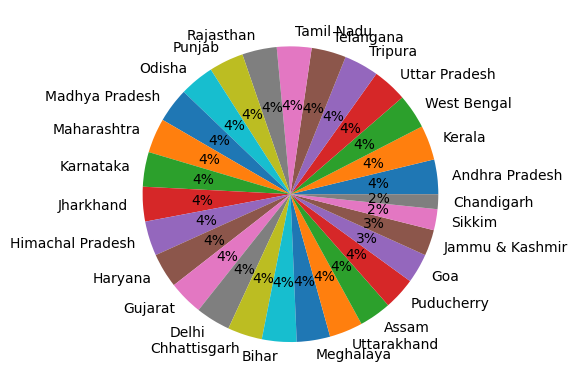

In [87]:
# Unemployement rate region wise

region = df['Region'].value_counts()
plt.pie(region,labels=region.keys(),autopct='%.0f%%')

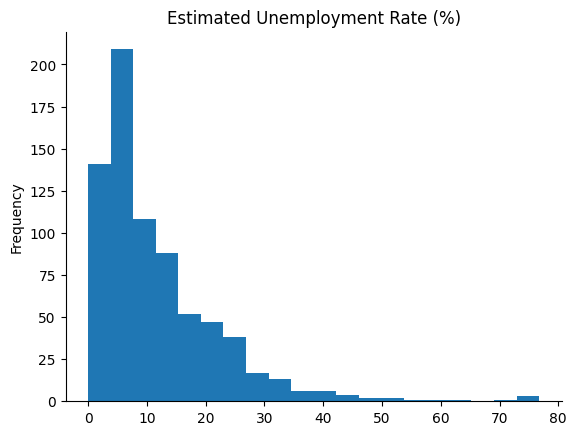

In [88]:
df['Estimated Unemployment Rate (%)'].plot(kind='hist', bins=20, title='Estimated Unemployment Rate (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

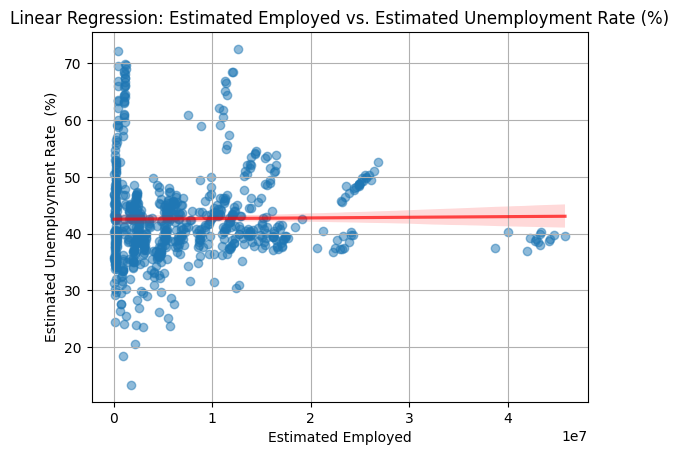

In [89]:
# Regression analysis between Estimated Employed and Estimated Unemployment Rate

sns.regplot(x='Estimated Employed',y='Estimated Labour Participation Rate (%)', data=df,scatter_kws={'alpha': 0.5},line_kws={'alpha': 0.7, 'color': 'red'})
plt.ylabel('Estimated Unemployment Rate  (%)')
plt.xlabel('Estimated Employed')
plt.title('Linear Regression: Estimated Employed vs. Estimated Unemployment Rate (%)')
plt.grid(True)

In [90]:
#Displaying the number of unique values in specific columns of dataframe df
print(len(df['Region'].unique()))
print(len(df['Area'].unique()))

28
2


***PIE CHART FOR AREA***

In [91]:
a=df['Area'].value_counts()
a

,count
Area,
Urban,381
Rural,359


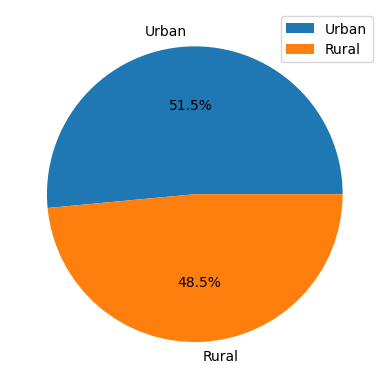

In [92]:
mylabel=['Urban','Rural']
plt.pie(a,labels=mylabel,autopct='%1.1f%%')
plt.legend(loc='upper right')

***COUNTPLOT OF AREA***

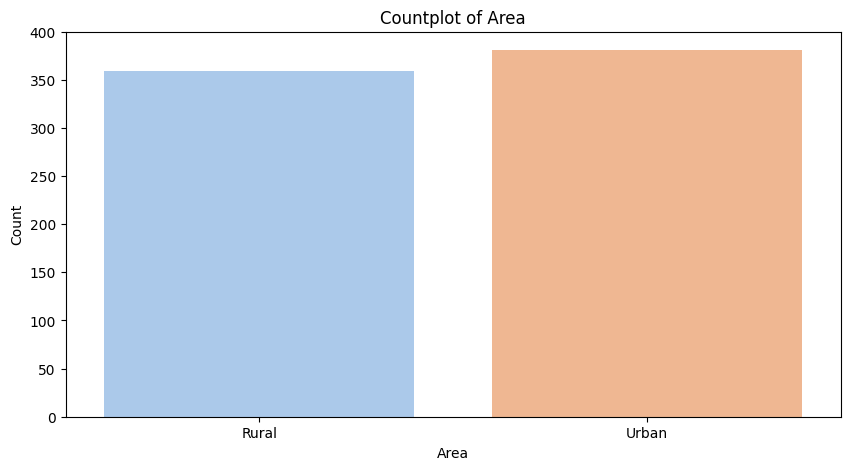

In [93]:
#countplot for Area
fig = plt.figure(figsize=(10, 5))
sns.countplot(x='Area', data=df,palette='pastel')
plt.title('Countplot of Area')
plt.xlabel('Area')
plt.ylabel('Count')
# save the plot
plt.savefig('countplot_area.png', dpi=300)
plt.show()

**Insights from the pie chart :**

- The given data is mainly based on two areas, the first one is Urban and the second one is Rural.

In [94]:
b=df['Region'].value_counts()
b

,count
Region,
Andhra Pradesh,28
Kerala,28
West Bengal,28
Uttar Pradesh,28
Tripura,28
Telangana,28
Tamil Nadu,28
Rajasthan,28
Punjab,28


***COUNTPLOT OF REGION***

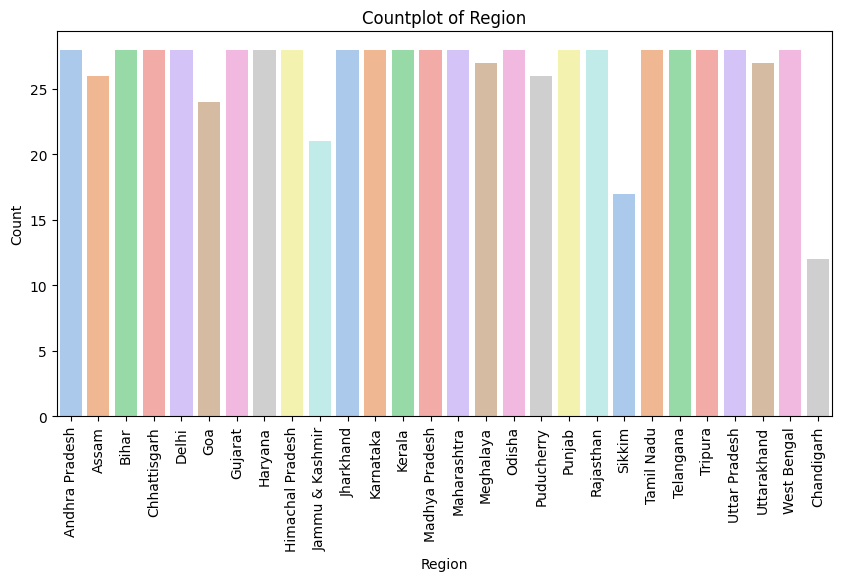

In [95]:
#Countplot for Region
plt.figure(figsize=(10, 5))
sns.countplot(x='Region', data=df,palette='pastel')
plt.xticks(rotation ='vertical')
plt.title('Countplot of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [96]:
df.dtypes

,0
Region,object
Date,datetime64[ns]
Frequency,object
Estimated Unemployment Rate (%),float64
Estimated Employed,float64
Estimated Labour Participation Rate (%),float64
Area,object
Day,int32
Month,object
Year,int32


***CORRELATION HEATMAP***

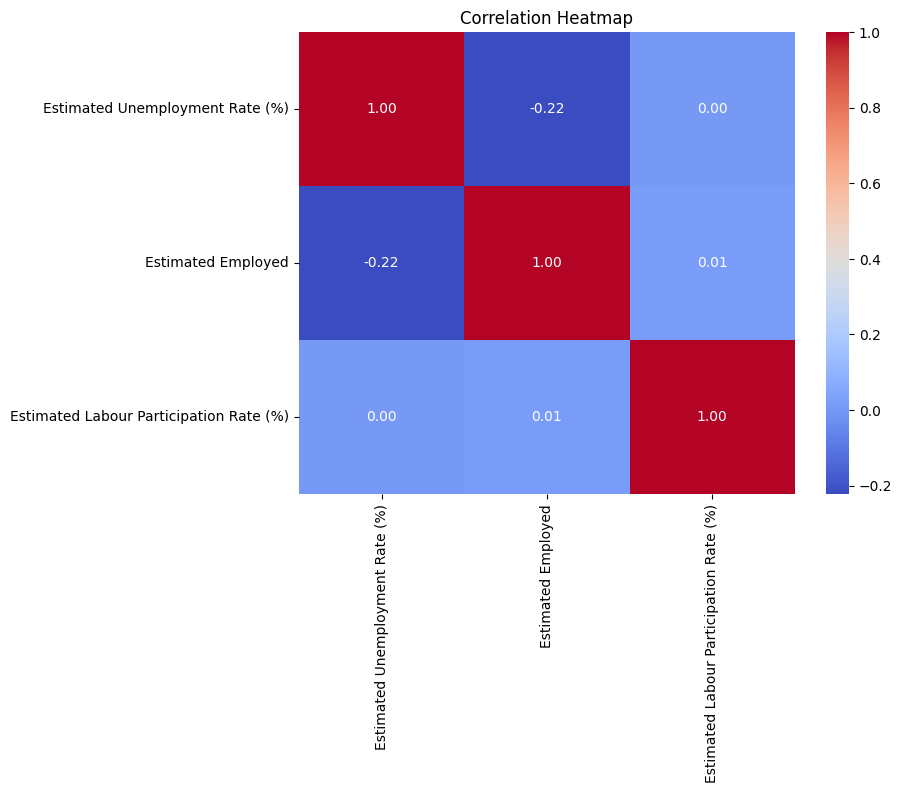

In [97]:
# Calculate correlation matrix
correlation = df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The above correlation heatmap displays the correlation coefficients between three variables related to unemployment data:

1. **Estimated Unemployment Rate (%)**
2. **Estimated Employed**
3. **Estimated Labour Participation Rate (%)**

### Insights from the Correlation Matrix

#### 1. **Estimated Unemployment Rate (%) vs. Estimated Employed**
- **Correlation Coefficient: -0.22**
  - **Interpretation**: There is a weak negative correlation between the unemployment rate and the number of employed people. This suggests that as the unemployment rate increases, the number of people employed tends to decrease, but this relationship is not very strong.

#### 2. **Estimated Unemployment Rate (%) vs. Estimated Labour Participation Rate (%)**
- **Correlation Coefficient: 0.00**
  - **Interpretation**: There is no correlation between the unemployment rate and the labor participation rate. This implies that changes in the unemployment rate do not have any direct relationship with changes in the labor participation rate.

#### 3. **Estimated Employed vs. Estimated Labour Participation Rate (%)**
- **Correlation Coefficient: 0.01**
  - **Interpretation**: There is no significant correlation between the number of employed people and the labor participation rate. This indicates that the number of people employed does not have a meaningful relationship with how many people are participating in the labor force.

### General Observations

- **Weak Correlations**: The correlation coefficients between all pairs of variables are close to zero, indicating weak or no linear relationships among them.
- **No Strong Linear Dependencies**: The data suggests that other factors may be influencing these variables, or the relationships are non-linear.
- **Further Analysis Needed**: The lack of strong correlations suggests that more advanced statistical methods or additional data may be needed to uncover potential causal factors or relationships.

***Unemployment Over Time***

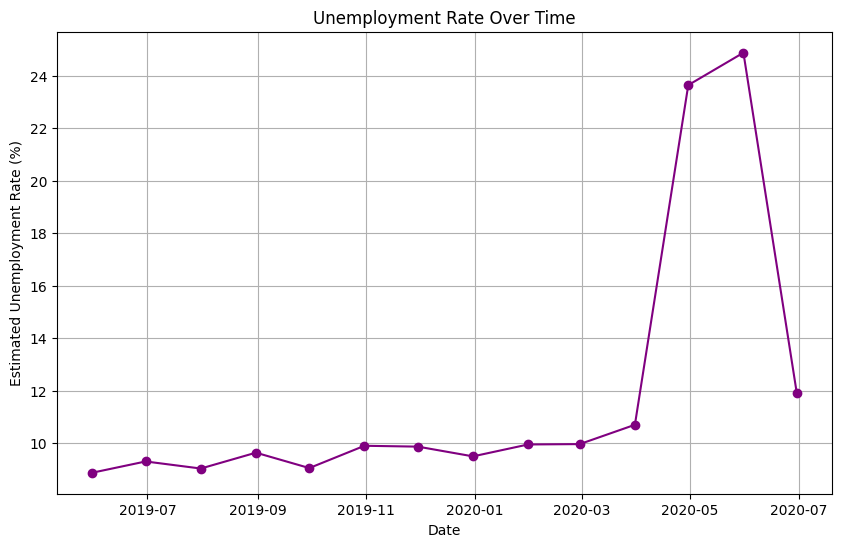

In [98]:
import matplotlib.pyplot as plt

# Grouping the data by Date and calculate the mean unemployment rate for each date
mean_unemployment_over_time = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='o', linestyle='-',color = 'purple')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()

*The plot reveals periods of particularly high unemployment rates, exceeding 10%, in April of 2020, followed by another peak which exceeds 22%, in May 2020 and exceeded 24% in June 2020.And there is also a drop to 12% in unemployment rate in July 2020.*

***Bar chart to show unemployment rate of each month***

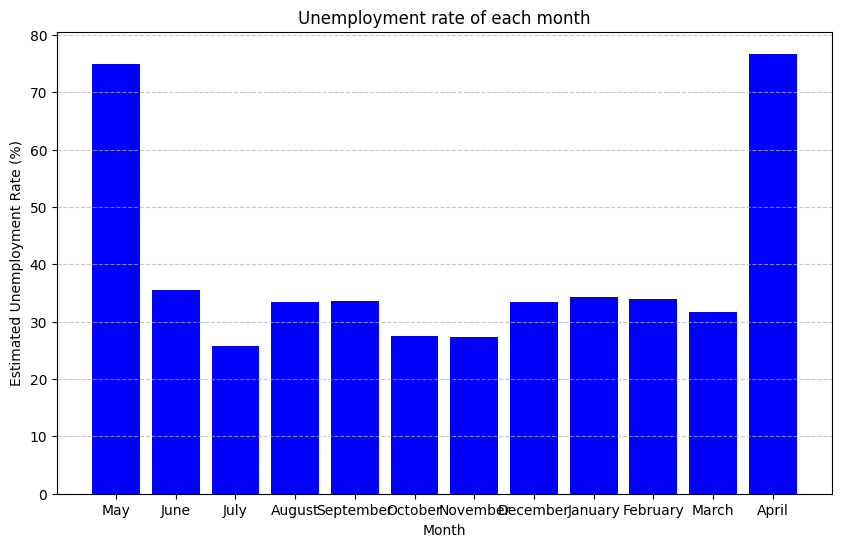

In [99]:
#Bar chart to show unemployment rate of each month

plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(df['Month'], df['Estimated Unemployment Rate (%)'], color='blue')

plt.title('Unemployment rate of each month')
plt.xlabel('Month')
plt.ylabel('Estimated Unemployment Rate (%)')

# Show grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

*So from here,we can see that the unemployment rate exceeds 70% in both months April and May.*

***Sunburst plot of Estimated Unemployment Rate by Region and Area***

In [100]:
# Create the Sunburst plot
fig = px.sunburst(df, path=['Area', 'Region'], values='Estimated Unemployment Rate (%)', title='Sunburst Plot of Estimated Unemployment Rate by Region and Area')
fig.show()